In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
%matplotlib inline

In [2]:
class KMeans(object):

    def __init__(self, k):
        self.k = k

    def fit(self, X, initial_centroid_index=None, max_iters=10, seed=16, plt_process=False):
        m, n = X.shape

        # 没有指定中心点时，随机初始化中心点
        if initial_centroid_index is None:
            np.random.seed(seed)
            initial_centroid_index = np.random.randint(0, m, self.k)

        centroid = X[initial_centroid_index, :]

        idx = None

        # 打开交互模式
        plt.ion()
        for i in range(max_iters):
            # 按照中心点给样本分类
            idx = self.find_closest_centroids(X, centroid)

            if plt_process:
                self.plot_converge(X, idx, initial_centroid_index)

            # 重新计算中心点
            centroid = self.compute_centroids(X, idx)

        # 关闭交互模式
        plt.ioff()
        plt.show()

        return centroid, idx

    def find_closest_centroids(self, X, centroid):

        # 这种方式利用 numpy 的广播机制，直接计算样本到各中心的距离，不用循环，速度比较快，但是在样本比较大时，更消耗内存
        distance = np.sum((X[:, np.newaxis, :] - centroid) ** 2, axis=2)
        idx = distance.argmin(axis=1)
        return idx

    def compute_centroids(self, X, idx):
        centroids = np.zeros((self.k, X.shape[1]))

        for i in range(self.k):
            centroids[i, :] = np.mean(X[idx == i], axis=0)

        return centroids

    def plot_converge(self, X, idx, initial_idx):
        plt.cla()  # 清除原有图像

        plt.title("k-meas converge process")
        plt.xlabel('density')
        plt.ylabel('sugar content')

        plt.scatter(X[:, 0], X[:, 1], c='lightcoral')
        # 标记初始化中心点
        plt.scatter(X[initial_idx, 0], X[initial_idx, 1], label='initial center', c='k')

        # 画出每个簇的凸包
        for i in range(self.k):
            X_i = X[idx == i]

            # 获取当前簇的凸包索引
            hull = ConvexHull(X_i).vertices.tolist()
            hull.append(hull[0])
            plt.plot(X_i[hull, 0], X_i[hull, 1], 'c--')

        plt.legend()
        plt.pause(0.5)

In [6]:
data = np.loadtxt('F:/DataSet/西瓜数据集data/4.0.csv', delimiter=',')

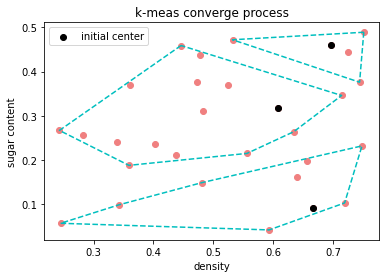

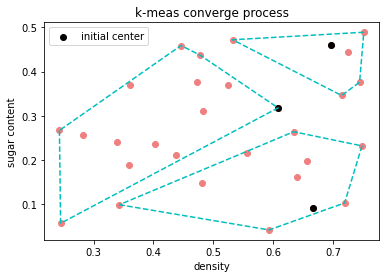

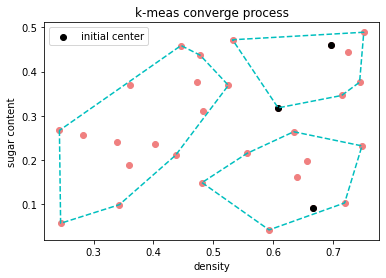

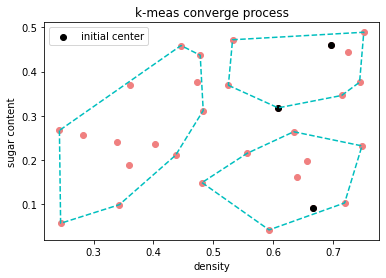

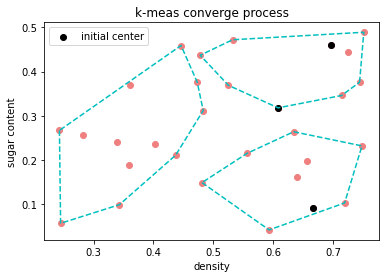

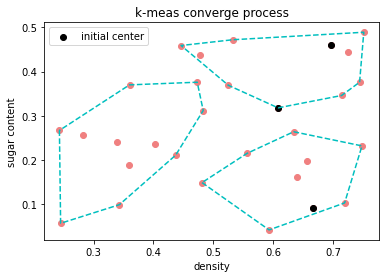

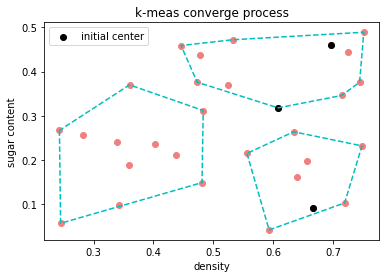

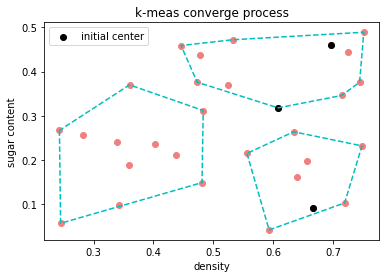

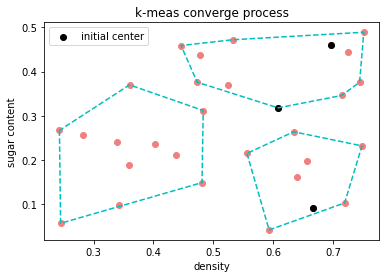

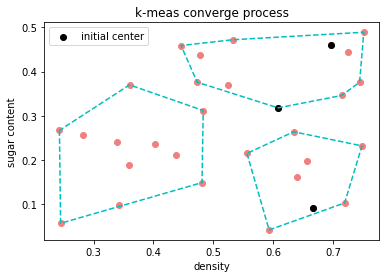

In [12]:
centrer,idx = KMeans(3).fit(data, plt_process=True, seed=2020)